# 网络爬虫 (Web Scraping) —— “黑客”模式

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
headers = {'User-Agent':'Mozilla/5.0(Macintosh;Intel Mac OS X 10_15_7) AppleWebKit/537.36(KHTML,like Gecko) Chrome/120.0.0.0 Safari/537.36'
           }
print('🕷️ 爬虫启动！正在潜入豆瓣电影 Top250 (的第一页)...')
url='https://movie.douban.com/top250'
response=requests.get(url,headers=headers)
if response.status_code==200:
    print('✅ 潜入成功！拿到网页源码！')
else:
    print(f'❌ 失败了，状态码:{response.status_code}')
soup = BeautifulSoup(response.text,'html.parser')
movie_list = soup.find_all('div',class_='item')
print(f'🔍 本页发现了{len(movie_list)}部电影。')
data=[]
for movie in movie_list:
    title = movie.find('span',class_='title').text
    rating = movie.find('span',class_='rating_num').text
    prople = movie.find(string=lambda x:'人评价' in str(x))
    people_num = prople.replace('人评价','')
    quote_tag=movie.find('span',class_='inq')
    if not quote_tag:
        print(f"⚠️ 警告：【{title}】 居然找不到金句标签！")
    quote = quote_tag.text if quote_tag else '无'
    data.append({"电影名": title,
        "评分": float(rating),
        "评价人数": int(people_num),
        "金句": quote})
df = pd.DataFrame(data)
print("-" * 30)
print("🎬 抓取结果预览：")
print(df.head())
best_movie = df.sort_values('评分',ascending=False).iloc[0]
print(f"\n🏆 本页评分冠军：{best_movie['电影名']} ({best_movie['评分']}分)")

🕷️ 爬虫启动！正在潜入豆瓣电影 Top250 (的第一页)...
✅ 潜入成功！拿到网页源码！
🔍 本页发现了25部电影。
⚠️ 警告：【肖申克的救赎】 居然找不到金句标签！
⚠️ 警告：【霸王别姬】 居然找不到金句标签！
⚠️ 警告：【泰坦尼克号】 居然找不到金句标签！
⚠️ 警告：【阿甘正传】 居然找不到金句标签！
⚠️ 警告：【千与千寻】 居然找不到金句标签！
⚠️ 警告：【美丽人生】 居然找不到金句标签！
⚠️ 警告：【星际穿越】 居然找不到金句标签！
⚠️ 警告：【这个杀手不太冷】 居然找不到金句标签！
⚠️ 警告：【盗梦空间】 居然找不到金句标签！
⚠️ 警告：【楚门的世界】 居然找不到金句标签！
⚠️ 警告：【辛德勒的名单】 居然找不到金句标签！
⚠️ 警告：【忠犬八公的故事】 居然找不到金句标签！
⚠️ 警告：【海上钢琴师】 居然找不到金句标签！
⚠️ 警告：【疯狂动物城】 居然找不到金句标签！
⚠️ 警告：【三傻大闹宝莱坞】 居然找不到金句标签！
⚠️ 警告：【机器人总动员】 居然找不到金句标签！
⚠️ 警告：【放牛班的春天】 居然找不到金句标签！
⚠️ 警告：【无间道】 居然找不到金句标签！
⚠️ 警告：【控方证人】 居然找不到金句标签！
⚠️ 警告：【大话西游之大圣娶亲】 居然找不到金句标签！
⚠️ 警告：【熔炉】 居然找不到金句标签！
⚠️ 警告：【寻梦环游记】 居然找不到金句标签！
⚠️ 警告：【触不可及】 居然找不到金句标签！
⚠️ 警告：【教父】 居然找不到金句标签！
⚠️ 警告：【当幸福来敲门】 居然找不到金句标签！
------------------------------
🎬 抓取结果预览：
      电影名   评分     评价人数 金句
0  肖申克的救赎  9.7  3240309  无
1    霸王别姬  9.6  2391401  无
2   泰坦尼克号  9.5  2462046  无
3    阿甘正传  9.5  2400589  无
4    千与千寻  9.4  2502186  无

🏆 本页评分冠军：肖申克的救赎 (9.7分)


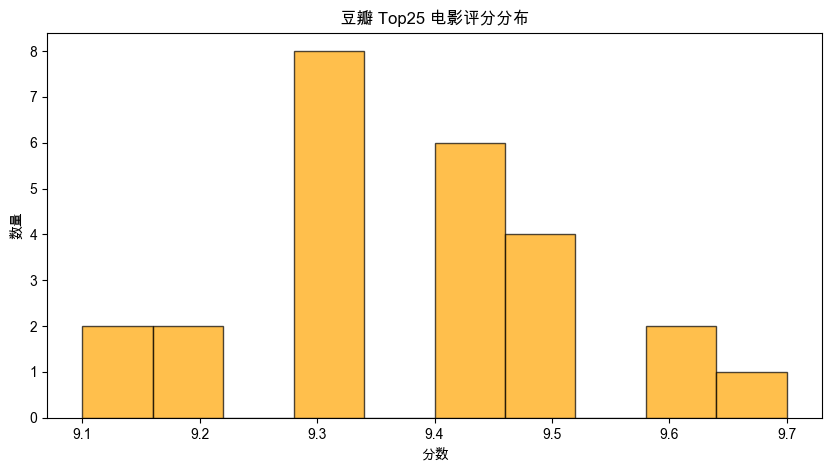

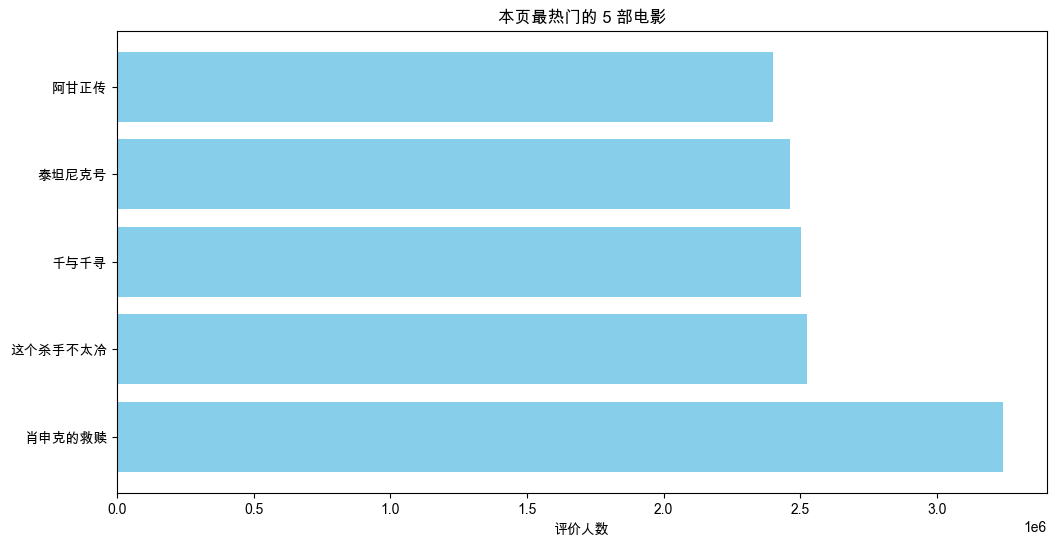

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df['评分'],bins=10,color='orange',edgecolor='black',alpha=0.7)
plt.title('豆瓣 Top25 电影评分分布')
plt.xlabel('分数')
plt.ylabel('数量')
plt.show()
plt.figure(figsize=(12,6))
top5_hot=df.sort_values('评价人数',ascending=False).head(5)
plt.barh(top5_hot['电影名'],top5_hot['评价人数'],color='skyblue')
plt.title('本页最热门的 5 部电影')
plt.xlabel('评价人数')
plt.show()
